In [2]:
#Classifyling:
#1. grey image (mnist)       # images of digits between 0 to 9
#2. color image (cifar10)    # images of different objects

<h1>mnist</h1>

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten   # conv2d = convolution layer
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  

In [4]:
# dataset already contains train and test datasets
(x_tr, y_tr), (x_ts, y_ts) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_tr.shape      # 60000 images of size 28 by 28

(60000, 28, 28)

In [6]:
y_tr.shape      # 60000 labels

(60000,)

In [7]:
x_ts.shape      # 10000 images of 28 by 28 size

(10000, 28, 28)

In [8]:
y_ts.shape      # 10000 labels

(10000,)

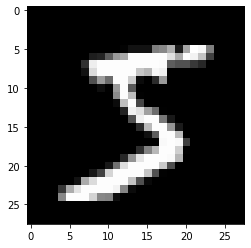

In [9]:
     # for viewing image

plt.imshow(x_tr[0], cmap = 'gray')

In [10]:
y_tr[0] #label

5

In [11]:
# reshape for specifying that images have 1 plane
x_train = x_tr.reshape(x_tr.shape[0], 28, 28, 1)
x_test = x_ts.reshape(x_ts.shape[0], 28, 28, 1)

In [12]:
x_train.shape       # now one plane associated to each image

(60000, 28, 28, 1)

In [13]:
# since all digits in an image in matrix form is integer we convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [14]:
# view output of all the output neuron
num_classes = 10
y_train_one_hot = np_utils.to_categorical(y_tr, num_classes)
y_test_one_hot = np_utils.to_categorical(y_ts, num_classes)

In [15]:
y_train_one_hot[0]      # output neuron data

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Creatting Model

In [16]:
# creating model
model = Sequential()
# adding convolution
model.add(Conv2D(25, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu', input_shape = (28,28,1)))   # 1st convolutional layer 
# 25 filters in first layer with stride 1x1 and filter size is 3x3
# if padding is 'valid' keras will not take any step i.e input and output image will not be same but 'same' will change size to make imput and output image same
model.add(MaxPool2D(pool_size = (2, 2)))      # 1st pooling layer
# 2x2 maxpool size
# converting 2D model to Vector (list)
model.add(Flatten())      # 2D layer of 1st layer is converted to 1D 
# now fully connected layer
model.add(Dense(100, activation = 'relu'))      # 1st hidden layer with 100 neurons
model.add(Dense(10, activation = 'softmax'))    # output layer with 10 classes (0 to 9 digits)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4225)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               422600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 423,860
Trainable params: 423,860
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting model for the dataset
model.fit(x_train, y_train_one_hot, batch_size = 128, epochs = 5, validation_data = (x_test, y_test_one_hot))

Epoch 1/5
469/469 [==============================] - 39s 49ms/step - loss: 0.4634 - accuracy: 0.8739 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 2/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0840 - accuracy: 0.9754 - val_loss: 0.0597 - val_accuracy: 0.9808
Epoch 3/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0520 - accuracy: 0.9853 - val_loss: 0.0504 - val_accuracy: 0.9835
Epoch 4/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0388 - accuracy: 0.9891 - val_loss: 0.0414 - val_accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0402 - val_accuracy: 0.9870


In [19]:
# checking if this model predicts correctly
predict = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
predict[100]

6

In [21]:
y_ts[100] #predicts correctly

6

In [22]:
y_test_one_hot[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

<h1><b><u>What this means:</u></b></h1><h3>
1. Convolution neural network is trained for mnist dataset using 1 convolutional layer and 2 fully connected layers. It is observed that training accuracy is 99.1% and testing accuracy is 98.7% for batch size 128 and epochs 5.<br>


<h1>cifar10</h1>

In [23]:
from keras.datasets import cifar10        #colored images dataset
# this dataset has 10 classes (birds, cars, truck, ect.)

In [24]:
# dataset already contains train and test datasets
(x_tr, y_tr), (x_ts, y_ts) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [25]:
x_tr.shape      # 60000 images of size 28 by 28 with 3 planes (RGB)

(50000, 32, 32, 3)

In [26]:
y_tr.shape      # 60000 labels

(50000, 1)

In [27]:
x_train=x_tr.reshape(x_tr.shape[0],32,32,3)
x_test=x_ts.reshape(x_ts.shape[0],32,32,3)

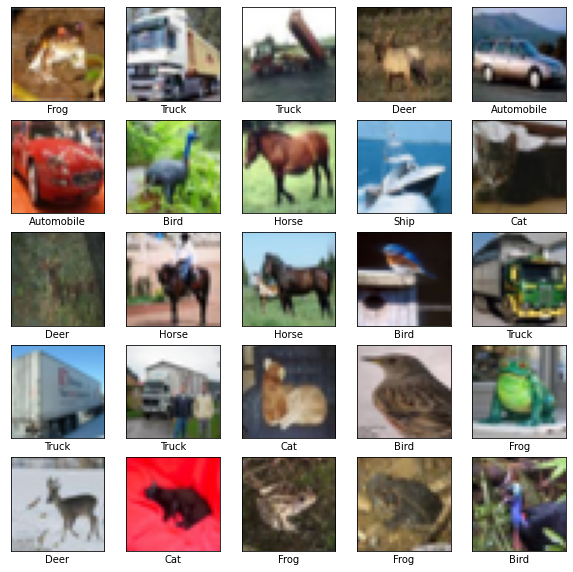

In [28]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
#if class is 0 then airplane and if class is 1 then automobile
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])   #black outline around figure
  plt.yticks([])
  plt.imshow(x_train[i],cmap='binary')
  plt.xlabel(class_names[y_tr[i][0]])   #if it is 4 it is deer

In [29]:
# since all the digits in an image in matrix format is integer convertit to float type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [30]:
# view the output of all the output neurons
num_classes = 10
y_train_one_hot = np_utils.to_categorical(y_tr, num_classes)
y_test_one_hot = np_utils.to_categorical(y_ts, num_classes)

Model Creation

In [31]:
# creating the model
model = Sequential()

# adding 1st convolutin set
model.add(Conv2D(50, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))   # 1st convolutional layer 
# 50 filters in first layer with stride 1x1 and filter size is 3x3
# if padding is 'same' will change the size to make imput and output image size same
model.add(MaxPool2D(pool_size = (2, 2)))      # 1st pooling layer
# we use 2x2 maxpool size
model.add(Conv2D(75, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))   # 2nd convolutional layer 
# 75 filters 
model.add(MaxPool2D(pool_size = (2, 2)))      # 2nd pooling layer

model.add(Dropout(0.25))      # to avoid overfitting 25% of the connections are broken / removed
model.add(Conv2D(125, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))   # 3rd convolutional layer 
# 125 filters
model.add(MaxPool2D(pool_size = (2, 2)))      # 3rd pooling layer
model.add(Dropout(0.25))    
# convert 2D model to Vector (list)
model.add(Flatten())      # 2D layer of the 1st layer is converted to 1D vector

# now fully connected layer
model.add(Dense(500, activation = 'relu'))      # 1st hidden layer with 500 neurons
model.add(Dropout(0.40))      # to avoid overfitting 40% of the connections are broken / removed

model.add(Dense(250, activation = 'relu'))    # 2nd hidden layer with 250 neurons
model.add(Dropout(0.30))      # to avoid overfitting 30% of the connections are broken / removed

model.add(Dense(10, activation = 'softmax'))    # output layer with 10 neurons

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 75)        33825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 75)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 75)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 125)         84500     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 125)        

In [33]:
# fitting model for the dataset
model.fit(x_train, y_train_one_hot, batch_size = 100, epochs = 7, validation_data = (x_test, y_test_one_hot))

Epoch 1/7
500/500 [==============================] - 202s 399ms/step - loss: 1.8952 - accuracy: 0.2874 - val_loss: 1.2673 - val_accuracy: 0.5404
Epoch 2/7
500/500 [==============================] - 197s 395ms/step - loss: 1.2717 - accuracy: 0.5425 - val_loss: 1.0791 - val_accuracy: 0.6163
Epoch 3/7
500/500 [==============================] - 196s 391ms/step - loss: 1.0837 - accuracy: 0.6164 - val_loss: 0.8842 - val_accuracy: 0.6856
Epoch 4/7
500/500 [==============================] - 197s 394ms/step - loss: 0.9637 - accuracy: 0.6615 - val_loss: 0.8331 - val_accuracy: 0.7101
Epoch 5/7
500/500 [==============================] - 197s 393ms/step - loss: 0.8755 - accuracy: 0.6933 - val_loss: 0.7784 - val_accuracy: 0.7265
Epoch 6/7
500/500 [==============================] - 195s 390ms/step - loss: 0.8176 - accuracy: 0.7120 - val_loss: 0.7618 - val_accuracy: 0.7335
Epoch 7/7
500/500 [==============================] - 194s 388ms/step - loss: 0.7580 - accuracy: 0.7361 - val_loss: 0.7259 - val_ac

In [34]:
# checking if this model predicts correctly
predict = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
predict[10]

0

In [36]:
y_ts[10]

array([0], dtype=uint8)

In [37]:
y_test_one_hot[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

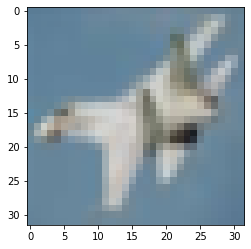

In [38]:
plt.imshow(x_ts[10], cmap = 'binary')